<a href="https://colab.research.google.com/github/jcmachicao/pucp_energy_efficiency_AI/blob/main/hvac_data_proc_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('HVAC_dataset.csv')
data.fillna(method="bfill", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  25632 non-null  object 
 1   on_off                25632 non-null  float64
 2   damper                25632 non-null  float64
 3   active_energy         25630 non-null  float64
 4   co2_1                 25632 non-null  float64
 5   amb_humid_1           25632 non-null  float64
 6   active_power          25632 non-null  float64
 7   pot_gen               25630 non-null  float64
 8   high_pressure_1       25632 non-null  float64
 9   high_pressure_2       25632 non-null  float64
 10  low_pressure_1        25632 non-null  float64
 11  low_pressure_2        25632 non-null  float64
 12  high_pressure_3       25632 non-null  float64
 13  low_pressure_3        25632 non-null  float64
 14  outside_temp          25632 non-null  float64
 15  outlet_temp        

<ipython-input-3-43700fd8be74>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="bfill", inplace=True)


In [4]:
data.Date.isna().sum()

0

In [5]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', infer_datetime_format=True)
data.set_index('Date', inplace=True)

<ipython-input-5-cf9c410c4bfa>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', infer_datetime_format=True)
<ipython-input-5-cf9c410c4bfa>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', infer_datetime_format=True)


In [6]:
data.index

DatetimeIndex(['2022-01-06 00:00:00', '2022-01-06 00:05:00',
               '2022-01-06 00:10:00', '2022-01-06 00:15:00',
               '2022-01-06 00:20:00', '2022-01-06 00:25:00',
               '2022-01-06 00:30:00', '2022-01-06 00:35:00',
               '2022-01-06 00:40:00', '2022-01-06 00:45:00',
               ...
               '2022-08-30 23:10:00', '2022-08-30 23:15:00',
               '2022-08-30 23:20:00', '2022-08-30 23:25:00',
               '2022-08-30 23:30:00', '2022-08-30 23:35:00',
               '2022-08-30 23:40:00', '2022-08-30 23:45:00',
               '2022-08-30 23:50:00', '2022-08-30 23:55:00'],
              dtype='datetime64[ns]', name='Date', length=25632, freq=None)

In [7]:
for c in data.columns:
    cats = data[c].unique()
    if len(cats) < 50:
        print(c, cats)

on_off [0. 1.]
amb_humid_1 [35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 34. 33. 32.
 50. 51.  0. 31. 30. 29. 52. 53. 28. 27. 26. 25. 24. 54. 55. 56. 57. 58.
 59. 60. 61. 62.]
summer_setpoint_temp [22.5 22.  22.1 22.9 22.2 22.8 23.  22.3 22.6 22.7 25.  23.5 24.  24.5
 24.1 23.6 24.8 24.2]
winter_setpoint_temp [18.  22.  19.5 18.5 20.  20.5]


In [9]:
data.head(2)

,on_off,damper,active_energy,co2_1,amb_humid_1,active_power,pot_gen,high_pressure_1,high_pressure_2,low_pressure_1,low_pressure_2,high_pressure_3,low_pressure_3,outside_temp,outlet_temp,inlet_temp,summer_setpoint_temp,winter_setpoint_temp,amb_temp_2
Date,,,,,,,,,,,,,,,,,,,
2022-01-06 00:00:00,0.0,0.0,363150.69,975.0,35.0,0.36,4.0,15.09,15.0,15.27,15.1,15.2,15.2,23.4,24.2,22.8,22.5,18.0,23.4
2022-01-06 00:05:00,0.0,0.0,363150.78,977.0,35.0,0.36,4.0,15.03,14.9,15.21,15.0,15.2,15.1,23.3,24.2,22.7,22.5,18.0,23.3


In [55]:
data.outside_temp

,outside_temp
Date,
2022-01-06 00:00:00,23.4
2022-01-06 00:05:00,23.3
2022-01-06 00:10:00,23.1
2022-01-06 00:15:00,23.1
2022-01-06 00:20:00,22.9
...,...
2022-08-30 23:35:00,27.0
2022-08-30 23:40:00,27.2
2022-08-30 23:45:00,27.1


<Axes: xlabel='Date'>

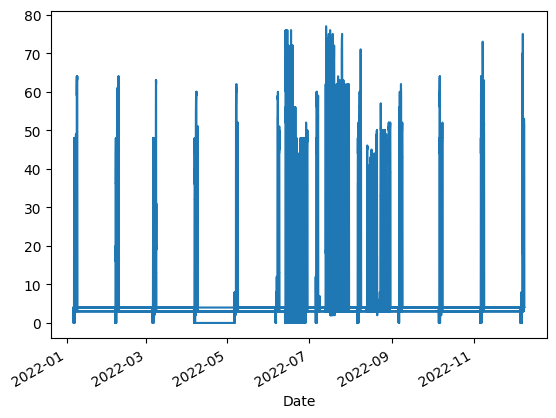

In [10]:
data.pot_gen.plot()

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [12]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
df.index = data.index

In [13]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df.index.day.unique()

Index([6, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       7, 30, 8],
      dtype='int32', name='Date')

In [15]:
df.index.month.unique()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Date')

In [16]:
df.index.year.unique()

Index([2022], dtype='int32', name='Date')

In [17]:
df.index.hour.unique()

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='Date')

In [56]:
df.columns

Index(['on_off', 'damper', 'active_energy', 'co2_1', 'amb_humid_1',
       'active_power', 'pot_gen', 'high_pressure_1', 'high_pressure_2',
       'low_pressure_1', 'low_pressure_2', 'high_pressure_3', 'low_pressure_3',
       'outside_temp', 'outlet_temp', 'inlet_temp', 'summer_setpoint_temp',
       'winter_setpoint_temp', 'amb_temp_2'],
      dtype='object')

In [57]:
output_variable_dt = 'on_off'
output_variable_nn = 'co2_1'

(1068, 19)


<ipython-input-58-fbad7e6c5763>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(filtered_date_df[(df.on_off == 0)], x="Date", y="inlet_temp", label="inlet=0")
<ipython-input-58-fbad7e6c5763>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(filtered_date_df[(df.on_off == 1)], x="Date", y="inlet_temp", label="inlet=1")


Text(0.5, 1.0, 'Temperature Measurement at 8/20')

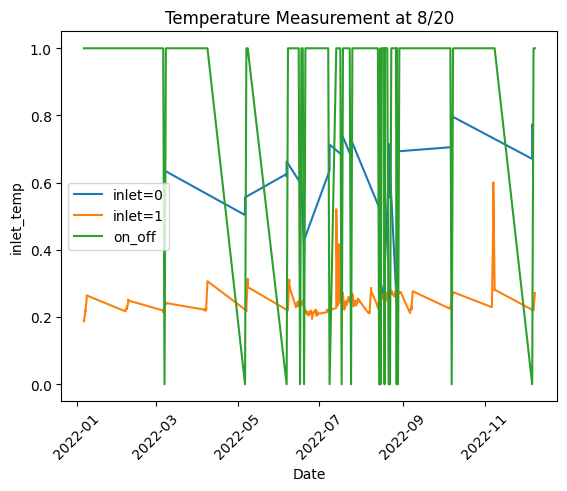

In [58]:
day = 20
month = 8
year = 2022
hour = 12
filtered_date_df = df[(df.index.hour == hour) & (df.index.hour == hour)]
print(filtered_date_df.shape)

sns.lineplot(filtered_date_df[(df.on_off == 0)], x="Date", y="inlet_temp", label="inlet=0")
sns.lineplot(filtered_date_df[(df.on_off == 1)], x="Date", y="inlet_temp", label="inlet=1")
sns.lineplot(filtered_date_df, x="Date", y=output_variable_dt, label=output_variable_dt)
# sns.lineplot(df[(df.Date.dt.day == 7) & (df.Date.dt.month == 1)], x="Date", y="outlet_temp", label="outlet")

plt.xticks(rotation=45)
plt.title(f"Temperature Measurement at {month}/{day}")

(1068, 19)


<ipython-input-32-681ed677af1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(filtered_date_df[(df.on_off == 0)], x="Date", y="inlet_temp", label="inlet=0")
<ipython-input-32-681ed677af1f>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(filtered_date_df[(df.on_off == 1)], x="Date", y="inlet_temp", label="inlet=1")


Text(0.5, 1.0, 'Temperature Measurement at 8/20')

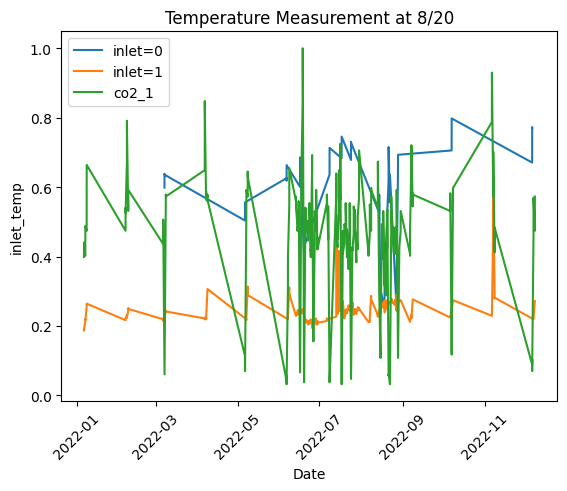

In [32]:
day = 20
month = 8
year = 2022
hour = 12
filtered_date_df = df[(df.index.hour == hour) & (df.index.hour == hour)]
print(filtered_date_df.shape)

sns.lineplot(filtered_date_df[(df.on_off == 0)], x="Date", y="inlet_temp", label="inlet=0")
sns.lineplot(filtered_date_df[(df.on_off == 1)], x="Date", y="inlet_temp", label="inlet=1")
sns.lineplot(filtered_date_df, x="Date", y=output_variable_nn, label=output_variable_nn)
# sns.lineplot(df[(df.Date.dt.day == 7) & (df.Date.dt.month == 1)], x="Date", y="outlet_temp", label="outlet")

plt.xticks(rotation=45)
plt.title(f"Temperature Measurement at {month}/{day}")

In [34]:
df.columns

Index(['on_off', 'damper', 'active_energy', 'co2_1', 'amb_humid_1',
       'active_power', 'pot_gen', 'high_pressure_1', 'high_pressure_2',
       'low_pressure_1', 'low_pressure_2', 'high_pressure_3', 'low_pressure_3',
       'outside_temp', 'outlet_temp', 'inlet_temp', 'summer_setpoint_temp',
       'winter_setpoint_temp', 'amb_temp_2'],
      dtype='object')

In [35]:
df.max()

,0
on_off,1.0
damper,1.0
active_energy,1.0
co2_1,1.0
amb_humid_1,1.0
active_power,1.0
pot_gen,1.0
high_pressure_1,1.0
high_pressure_2,1.0
low_pressure_1,1.0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
features_dt = ["inlet_temp","outside_temp", "amb_humid_1"]
features_nn = ["inlet_temp","outside_temp", "amb_humid_1", 'active_power', 'high_pressure_1', 'low_pressure_1']

In [59]:
target = output_variable_dt

In [60]:
X = df[features_dt]
y = df[target]

In [61]:
X.isna().sum()

,0
inlet_temp,0
outside_temp,0
amb_humid_1,0


In [62]:
y.isna().sum()

0

In [64]:
y.unique()

array([0., 1.])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19224, 3), (6408, 3), (19224,), (6408,))

In [67]:
model = DecisionTreeClassifier()

dev_score = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Model CV Accuracy :{dev_score.mean()}")
print(f"Model Test Accuracy :{test_score}")

Model CV Accuracy :0.9249899256977926
Model Test Accuracy :0.9269662921348315


In [68]:
model = LinearRegression()
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Model CV Accuracy :{dev_score.mean()}")
print(f"Model Test Accuracy :{test_score}")

Model CV Accuracy :0.9249899256977926
Model Test Accuracy :0.5747523066922391


## Neural Network

In [69]:
target = output_variable_nn
X = df[features_nn]
y = df[target]

In [70]:
X.isna().sum(), y.isna().sum()

(inlet_temp         0
 outside_temp       0
 amb_humid_1        0
 active_power       0
 high_pressure_1    0
 low_pressure_1     0
 dtype: int64,
 0)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19224, 6), (6408, 6), (19224,), (6408,))

In [72]:
import torch
import torch.nn as nn

# Define the neural network
class SimpleRegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 4)
        self.fc4 = nn.Linear(4, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [73]:
# Hyperparameters
input_size = 6  # Adjust based on your input features
hidden_size = 32
output_size = 1

# Create the model
model_nn = SimpleRegressionNet(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_nn.parameters(), lr=0.01)

In [74]:
inputs = torch.tensor(X_train.values, dtype=torch.float32)
labels = torch.tensor(y_train.values, dtype=torch.float32)

In [75]:
epochs = 200

# Training loop
for epoch in range(epochs):
    # Forward pass
    outputs = model_nn(inputs)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([19224])) that is different to the input size (torch.Size([19224, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/200], Loss: 0.0718
Epoch [20/200], Loss: 0.0648
Epoch [30/200], Loss: 0.0417
Epoch [40/200], Loss: 0.0395
Epoch [50/200], Loss: 0.0382
Epoch [60/200], Loss: 0.0380
Epoch [70/200], Loss: 0.0377
Epoch [80/200], Loss: 0.0375
Epoch [90/200], Loss: 0.0373
Epoch [100/200], Loss: 0.0373
Epoch [110/200], Loss: 0.0372
Epoch [120/200], Loss: 0.0372
Epoch [130/200], Loss: 0.0371
Epoch [140/200], Loss: 0.0371
Epoch [150/200], Loss: 0.0371
Epoch [160/200], Loss: 0.0371
Epoch [170/200], Loss: 0.0371
Epoch [180/200], Loss: 0.0370
Epoch [190/200], Loss: 0.0370
Epoch [200/200], Loss: 0.0370


In [76]:
validation_data = torch.tensor(X_train[0:200].values, dtype=torch.float32)
validation_labels = torch.tensor(y_train[0:200].values, dtype=torch.float32)

In [77]:
import torch.nn.functional as F

with torch.no_grad():

    # Calculate predictions on the validation set
    predictions = model_nn(validation_data).squeeze(1)

    # Calculate loss
    loss = criterion(predictions, validation_labels)

    # Calculate other metrics
    mse = F.mse_loss(predictions, validation_labels)
    rmse = torch.sqrt(mse)
    mae = F.l1_loss(predictions, validation_labels)

    print(f"Validation Loss: {loss.item():.4f}")
    print(f"MSE: {mse.item():.4f}")
    print(f"RMSE: {rmse.item():.4f}")
    print(f"MAE: {mae.item():.4f}")

Validation Loss: 0.0291
MSE: 0.0291
RMSE: 0.1707
MAE: 0.1421


### References

https://www.kaggle.com/code/kiritowu/aircon-classification-w-temperature-humidity/notebook